<a href="https://colab.research.google.com/github/hgo641/ai_assignments/blob/main/Assignment4_12183590_%ED%99%8D%EC%97%AC%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 4 1번

In [ ]:
# 모듈 import
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 0~9까지 10개의 수를 나타내야하므로 10
num_classes = 10

# input인 2d 이미지가 28x28x1 형태
input_shape = (28, 28, 1)

# keras에서 dataset을 불러옴
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 

In [ ]:
# 불러온 data들을 nomalize
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# data 차원수를 맞춰줌
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
# 원핫벡터로 컨버터하여 신경망 아웃풋과 손실률을 구할 수 있는 카테고리로 맞춰줌
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# CNN 모델 생성
model = keras.Sequential()
model.add(keras.Input(shape = input_shape))
# 32개의 3x3 filter 생성
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [ ]:
# Training Parameters

# Train data 를 나누는 크기
batch_size = 128

# 갖고있는 dataset을 모델에 몇 번 학습시킬건지
epochs = 20

# 손실함수, 정확도 설정
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1)


Epoch 1/20
422/422 [==============================] - 42s 98ms/step - loss: 0.3739 - accuracy: 0.8898 - val_loss: 0.0820 - val_accuracy: 0.9768
Epoch 2/20
422/422 [==============================] - 41s 98ms/step - loss: 0.1100 - accuracy: 0.9675 - val_loss: 0.0528 - val_accuracy: 0.9868
Epoch 3/20
422/422 [==============================] - 45s 107ms/step - loss: 0.0840 - accuracy: 0.9739 - val_loss: 0.0466 - val_accuracy: 0.9870
Epoch 4/20
422/422 [==============================] - 45s 107ms/step - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0416 - val_accuracy: 0.9892
Epoch 5/20
422/422 [==============================] - 46s 109ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0386 - val_accuracy: 0.9893
Epoch 6/20
422/422 [==============================] - 41s 97ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0353 - val_accuracy: 0.9912
Epoch 7/20
422/422 [==============================] - 47s 111ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0344 - val_accur

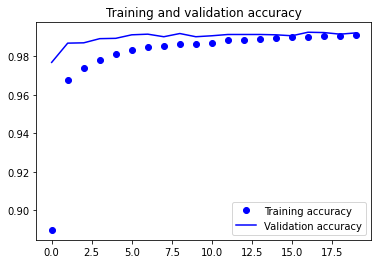

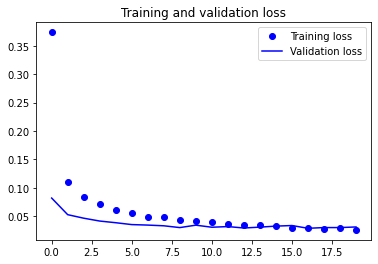

In [ ]:
# Training and validataion accuracy와 loss 그래프 출력
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label="Training accuracy")
plt.plot(list(range(epochs)), val_accuracy, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 학습된 모델 평가 : loss 와 accracy 출력
score = model.evaluate(x_test, y_test, verbose = 0)
print("text loss:", score[0])
print("text accracy:", score[1])

text loss: 0.025036675855517387
text accracy: 0.9919000267982483


Image shape: (28, 28, 1)
True image label array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image label shape: (10,) 
True Image label: 7


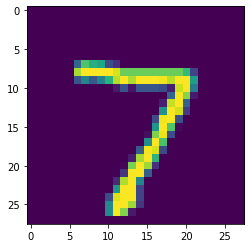

Predicted image label array: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000'] 
Predicted image label shape: (1, 10) 
Predicted image label: 7


In [ ]:
# 위에서 생성한 모델에 이미지 넣어보고 결과보기

img_id = 0

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print("Image shape:", sample_test_image.shape)
print("True image label array:", sample_test_label,
      '\nTrue Image label shape:', sample_test_label.shape,
      '\nTrue Image label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28, 28), interpolation = 'nearest')
plt.show()

prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))

print("Predicted image label array:", ['{0:0.3f}'.format(i) for i in prediction[0]],
      '\nPredicted image label shape:', prediction.shape,
      '\nPredicted image label:', np.argmax(prediction))

2번



In [ ]:
# 위 모델과 다른 구조의 모델 생성
# convolution 커널 사이즈 변경
# convolution activation sigmoid로 변경
model = keras.Sequential()
model.add(keras.Input(shape = input_shape))


model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='sigmoid'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(5, 5), activation='sigmoid'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 2, 2, 64)         0         
 g2D)                                                            
                                                      

In [ ]:
# Training Parameters

# Train data 를 나누는 크기
batch_size = 128

# 갖고있는 dataset을 모델에 몇 번 학습시킬건지
epochs = 15

# 손실함수, 정확도 설정
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 55s 128ms/step - loss: 1.8887 - accuracy: 0.3164 - val_loss: 0.5880 - val_accuracy: 0.8713
Epoch 2/15
422/422 [==============================] - 50s 119ms/step - loss: 0.5136 - accuracy: 0.8486 - val_loss: 0.2116 - val_accuracy: 0.9450
Epoch 3/15
422/422 [==============================] - 56s 132ms/step - loss: 0.3086 - accuracy: 0.9088 - val_loss: 0.1426 - val_accuracy: 0.9603
Epoch 4/15
422/422 [==============================] - 56s 133ms/step - loss: 0.2414 - accuracy: 0.9296 - val_loss: 0.1074 - val_accuracy: 0.9695
Epoch 5/15
422/422 [==============================] - 51s 121ms/step - loss: 0.1999 - accuracy: 0.9415 - val_loss: 0.0900 - val_accuracy: 0.9760
Epoch 6/15
422/422 [==============================] - 52s 123ms/step - loss: 0.1755 - accuracy: 0.9480 - val_loss: 0.0801 - val_accuracy: 0.9772
Epoch 7/15
422/422 [==============================] - 52s 122ms/step - loss: 0.1564 - accuracy: 0.9534 - val_loss: 0.0713 - val_ac

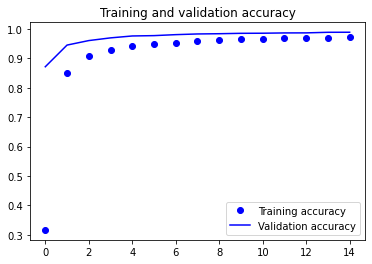

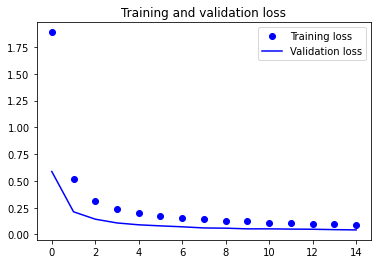

In [ ]:
# Training and validataion accuracy와 loss 그래프 출력
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(list(range(epochs)), train_accuracy, 'bo', label="Training accuracy")
plt.plot(list(range(epochs)), val_accuracy, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(epochs)), train_loss, 'bo', label='Training loss')
plt.plot(list(range(epochs)), val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# 학습된 모델 평가 : loss 와 accracy 출력
score = model.evaluate(x_test, y_test, verbose = 0)
print("text loss:", score[0])
print("text accracy:", score[1])

text loss: 0.04573265090584755
text accracy: 0.9865000247955322


Image sahpe: (28, 28, 1)
true image label array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 
True Image label shape: (10,) 
True Image label: 7


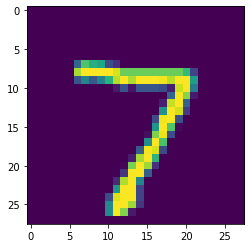

predicted image label array: ['0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '0.000', '1.000', '0.000', '0.000'] 
predicted image label shape: (1, 10) 
predicted image label: 7


In [ ]:
# 위에서 생성한 모델에 이미지 넣어보고 결과보기
img_id = 0

sample_test_image = x_test[img_id]
sample_test_label = y_test[img_id]

print("Image sahpe:", sample_test_image.shape)
print("true image label array:", sample_test_label,
      '\nTrue Image label shape:', sample_test_label.shape,
      '\nTrue Image label:', np.argmax(sample_test_label))
plt.imshow(sample_test_image.reshape(28, 28), interpolation = 'nearest')
plt.show()

prediction = model.predict(sample_test_image.reshape(1, 28, 28, 1))

print("predicted image label array:", ['{0:0.3f}'.format(i) for i in prediction[0]],
      '\npredicted image label shape:', prediction.shape,
      '\npredicted image label:', np.argmax(prediction))

<h1>Summary</h1>

이번 과제를 통해 CNN 모델을 생성해 Convolution과 maxpooling을 해볼 수 있었다. CNN은 이미지의 공간 정보를 유지한 상태로 학습이 가능한 모델이기에 이미지 특징을 추출하는데 자주 사용된다.

numpy의 expand_dims 함수를 통해 numpy배열의 차원을 추가하고 줄일 수 있음을 알게되었다. input과 output의 차원수를 일치시키기 위해 expand_dims 함수를 사용했다.

데이터를 중복없이 표현하기 위해 원핫벡터를 사용할 수 있음을 이번 과제 설명 영상을 통해 알게되었다. 0~9 까지의 각 숫자에 고유한 인덱스를 부여해 원핫벡터로 표현했다.

CNN 모델을 생성하고 summary() 함수 출력 결과를 통해 Maxpooling 과정을 통해 layer가 resizing되는 것을 확인할 수 있었다. 위에서는 pool_size를 (2, 2)로 설정했기에 size가 2배로 줄어드는 것을 볼 수 있다.

이전 과제에서 학습했던 sigmoid외 ReLu, softmax라는 활성화 함수가 있음을 알게되었고 사용해볼 수 있었다. 
